In [209]:
import numpy as np
import pandas as pd
from ord_data_load import ORD_PATH, df_na_vals
from chem_render import draw_reaction

#to disable warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Inspect COMPOUNDS dataset

In [5]:
%%time
df = pd.read_pickle(f"{ORD_PATH}/uspto_cmpd_df.pkl.zst")

CPU times: total: 6.11 s
Wall time: 6.11 s


In [9]:
df_na_vals(df)

trivial       ->      Missing values: 8840707 (89.04%)
name          ->      Missing values: 0 (0.00%)
smiles        ->      Missing values: 451722 (4.55%)
rxn_role      ->      Missing values: 0 (0.00%)


[]

### inspect missing smiles

In [17]:
df[df.smiles.isna()].name.value_counts()

solution                                                                                      37355
ice water                                                                                     29384
solid                                                                                         19056
ice                                                                                           18000
resultant mixture                                                                             10785
                                                                                              ...  
hdyrochloric acid                                                                                 1
C23H24BrClN4O3S                                                                                   1
1-(4-Bromo-benzyl)-4-4-(4-methoxy-benzensulfonyl)-piperidine-4-carboxylic acid ethyl ester        1
3,3'-Dimethyl-1,1'-peroxydicyclohexylamine                                                        1


In [24]:
solutions = df[df.smiles.isna() & (df.name == 'solution')].index
solutions

Index(['ord-000079a2dfc64037819f825beb8631fb',
       'ord-0000f123c9294e2caccd8f64aa8d34df',
       'ord-0002b5ac3991404ab05957e154a92a27',
       'ord-0002b5ac3991404ab05957e154a92a27',
       'ord-00062b2b578d48ce8918f1ca42fdb69e',
       'ord-0007cd765fe54b64b07858dc7e5f967f',
       'ord-00085b83a4cf4debb30abe45acdda265',
       'ord-000e6417d75a42e8adca18fbd6c63e1c',
       'ord-00120fb6701a4428b594faf0f8fa9e47',
       'ord-001407325e0a4206996fc59e29645b69',
       ...
       'ord-fff068e8a2244f0b9e0fb9b52d8ee061',
       'ord-fff14479af3a476ca19689246225b8ff',
       'ord-fff245936c25442bbc091f0c38c377aa',
       'ord-fff2ba1b05d24dbb91544fb1260fe7d5',
       'ord-fff4564f742144e5ae6b731355d87403',
       'ord-fff5081485734476883d4ce21746a562',
       'ord-fff56f4a304e4696a47f470d4f06200f',
       'ord-fff594a213804b30b5d2190ee9127022',
       'ord-fffa3bc195f549b683574613437dd398',
       'ord-fffd1139847e4854bcdec412356e6a6b'],
      dtype='object', length=37355)

In [19]:
%%time
rxn = pd.read_pickle(f"{ORD_PATH}/uspto_rxn_df.pkl.zst")

CPU times: total: 5.88 s
Wall time: 5.87 s


In [25]:
rxn.loc[solutions]

,rxn_smiles,time,temp,yield,patent,notes
ord-000079a2dfc64037819f825beb8631fb,[NH2:1][C:2](=[O:29])[C:3]([NH:5][CH:6]([C:23]...,0.25,0.0,None,US04113943,13 g. of the product of Example 12 are added t...
ord-0000f123c9294e2caccd8f64aa8d34df,[Br:1][C:2]1[CH:3]=[C:4]2[CH2:10][C:9](=O)[NH:...,0.583333,0.0,None,US07235550B2,Under an argon atmosphere and in an anhydrous ...
ord-0002b5ac3991404ab05957e154a92a27,[F:1][C:2]1[CH:3]=[C:4]2[C:8](=[CH:9][CH:10]=1...,0.166667,0.0,None,US08455535B2,"A solution of 5-fluoro-1,3-dihydro-indol-2-one..."
ord-0002b5ac3991404ab05957e154a92a27,[F:1][C:2]1[CH:3]=[C:4]2[C:8](=[CH:9][CH:10]=1...,0.166667,0.0,None,US08455535B2,"A solution of 5-fluoro-1,3-dihydro-indol-2-one..."
ord-00062b2b578d48ce8918f1ca42fdb69e,[H-].[Na+].[CH2:3]([O:10][CH2:11][CH2:12][O:13...,0.5,0.0,68.0,US07919653B2,To an ice-cooled suspension of sodium hydride ...
...,...,...,...,...,...,...
ord-fff5081485734476883d4ce21746a562,[F:1][C:2]1[C:7]([F:8])=[CH:6][CH:5]=[C:4]([O:...,4.0,0.0,67.5,US09273067B2,"To a solution of 2-(2,3-difluoro-6-methoxyphen..."
ord-fff56f4a304e4696a47f470d4f06200f,[CH:1]1([C:6]([C:8]2[CH:9]=[C:10]([CH2:23][C:2...,None,0.0,None,US07897628B2,2-[3-Cyclopentanecarbonyl-4-(3-thiazol-2-yl-ur...
ord-fff594a213804b30b5d2190ee9127022,COC[O:4][C:5]1[C:6]([CH2:11][C:12]2[CH:17]=[CH...,96.0,0.0,75.900002,US06413947B1,To a solution of N-[4—(3-methoxymethoxypyridin...
ord-fffa3bc195f549b683574613437dd398,[C:1]([O:20][CH2:21][C@H:22]1[O:26][C:25](=[O:...,1.5,0.0,None,US06498159B1,26.9 g of (5S)-5-[(trityloxy)methyl]tetrahydro...


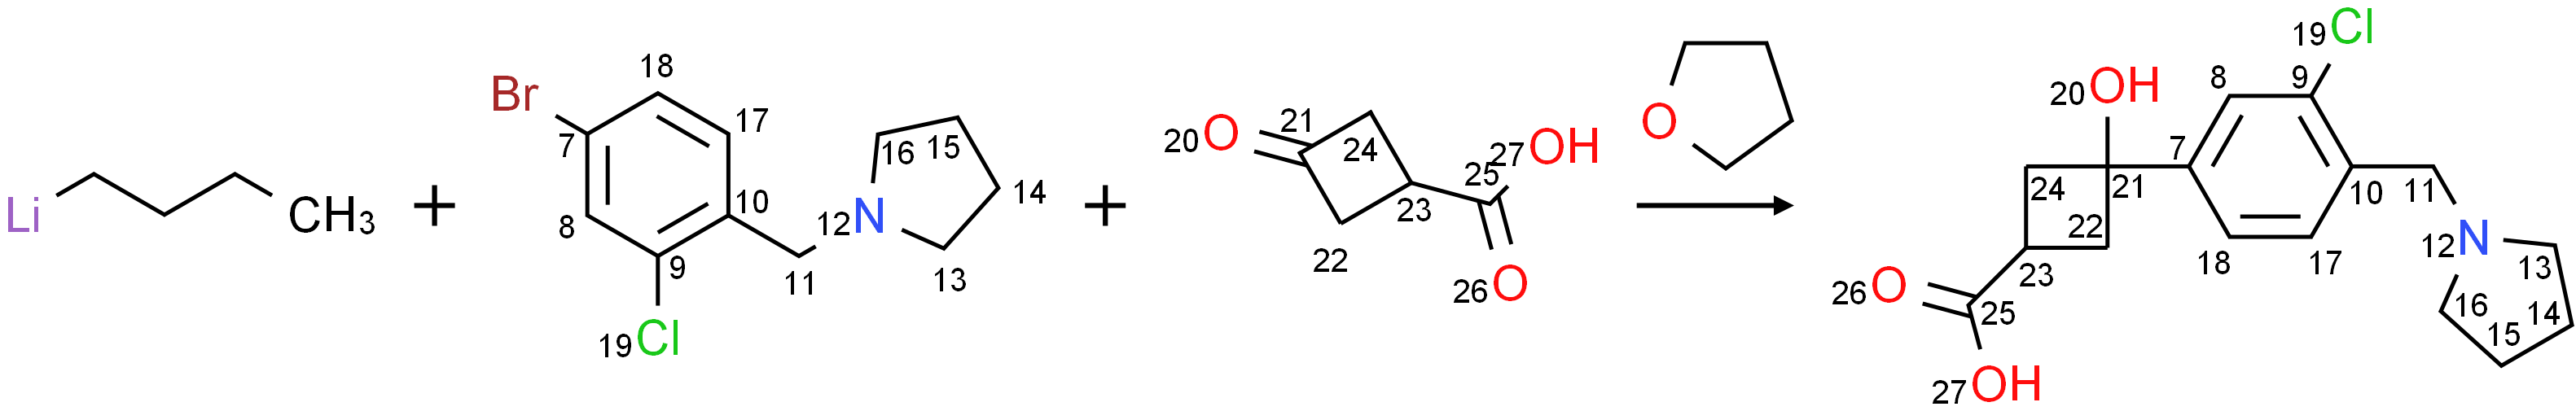

Patent:       US08389743B2
Reaction_id:  ord-746a97e343234af7a5d8e8762e215507
A 2.5 M solution of n-BuLi in hexanes (101 mL, 254 mmol) was added over 15 min to a solution of 1-(4-bromo-2-chlorobenzyl)pyrrolidine (69.6 g, 254 mmol) in absolute THF (450 ml) under a flow of nitrogen at −78° C. The reaction mixture was stirred at −78° C. for 30 min. Then a −78° C. chilled solution of 3-oxocyclobutanecarboxylic acid (14.4 g, 126.7 mmol) in absolute THF (150 ml) was added drop wise for 10 min at −78° C. The mixture was warmed to RT slowly and left stirring for 18 hrs and the resulting solution was used. LRMS m/z Calcd for C16H20NClO3, 309.8, found, 308.1 (M−H) APCI.


In [47]:
draw_reaction(rxn.loc[solutions], highlight_text='solution')

In [50]:
# REACTANT  1
# SOLVENT   3
# CATALYST  4
# WORKUP    5
# PRODUCT   8

df[df.smiles.isna() & (df.name == 'solution')].rxn_role.value_counts()

1    36053
3      993
8      242
4       67
Name: rxn_role, dtype: int64

In [66]:
idx = df[df.smiles.isna() & (df.name == 'solution') & (df.rxn_role == 4)].index

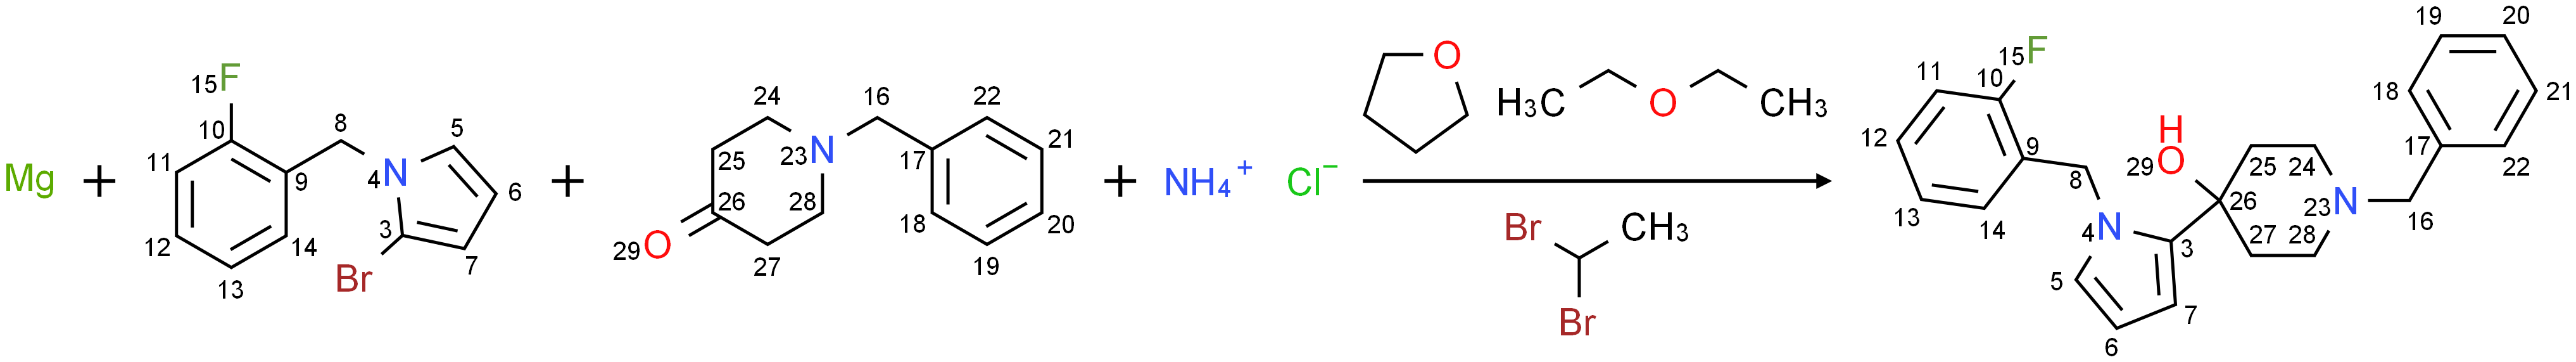

Patent:       US05215984
Reaction_id:  ord-c3ee9230aea14a8eb3977bbb34cbd19d
To a suspension of magnesium turnings (2.2 g, 0.09 mole) in 60 ml tetrahydrofuran (THF) and 30 ml ether, was added a few drops of a solution of 2-bromo-1-(2-fluorobenzyl)pyrrole (20 g, 0.074 mole) in 60 ml THF. The reaction was initiated with a few drops of dibromoethane and heat, and reflux was maintained by the addition of the bromo compound. After stirring at reflux for 30 minutes, the mixture was cooled with an ice bath, then a solution of 1-benzyl-4-piperidone (11.2 g, 0.06 mole) in 75 ml THF was added. After stirring at ambient temperature for one hour, the mixture was poured into NH4Cl solution, then extracted with ethyl acetate. The ethyl acetate solution was washed with water, then dried over anhydrous MgSO4. After evaporation of the solvent, the resultant oil (25 g) was purified by HPLC, using ethyl acetate/hexane/diethylamine (30:70:0.5) as the eluent to give 15.8 g of 4-[1-((2-fluorophenyl)methyl)- 

In [67]:
draw_reaction(rxn.loc[idx], highlight_text='solution')

In [106]:
idx = df[df.smiles.isna() & (df.name == 'TEA')].index

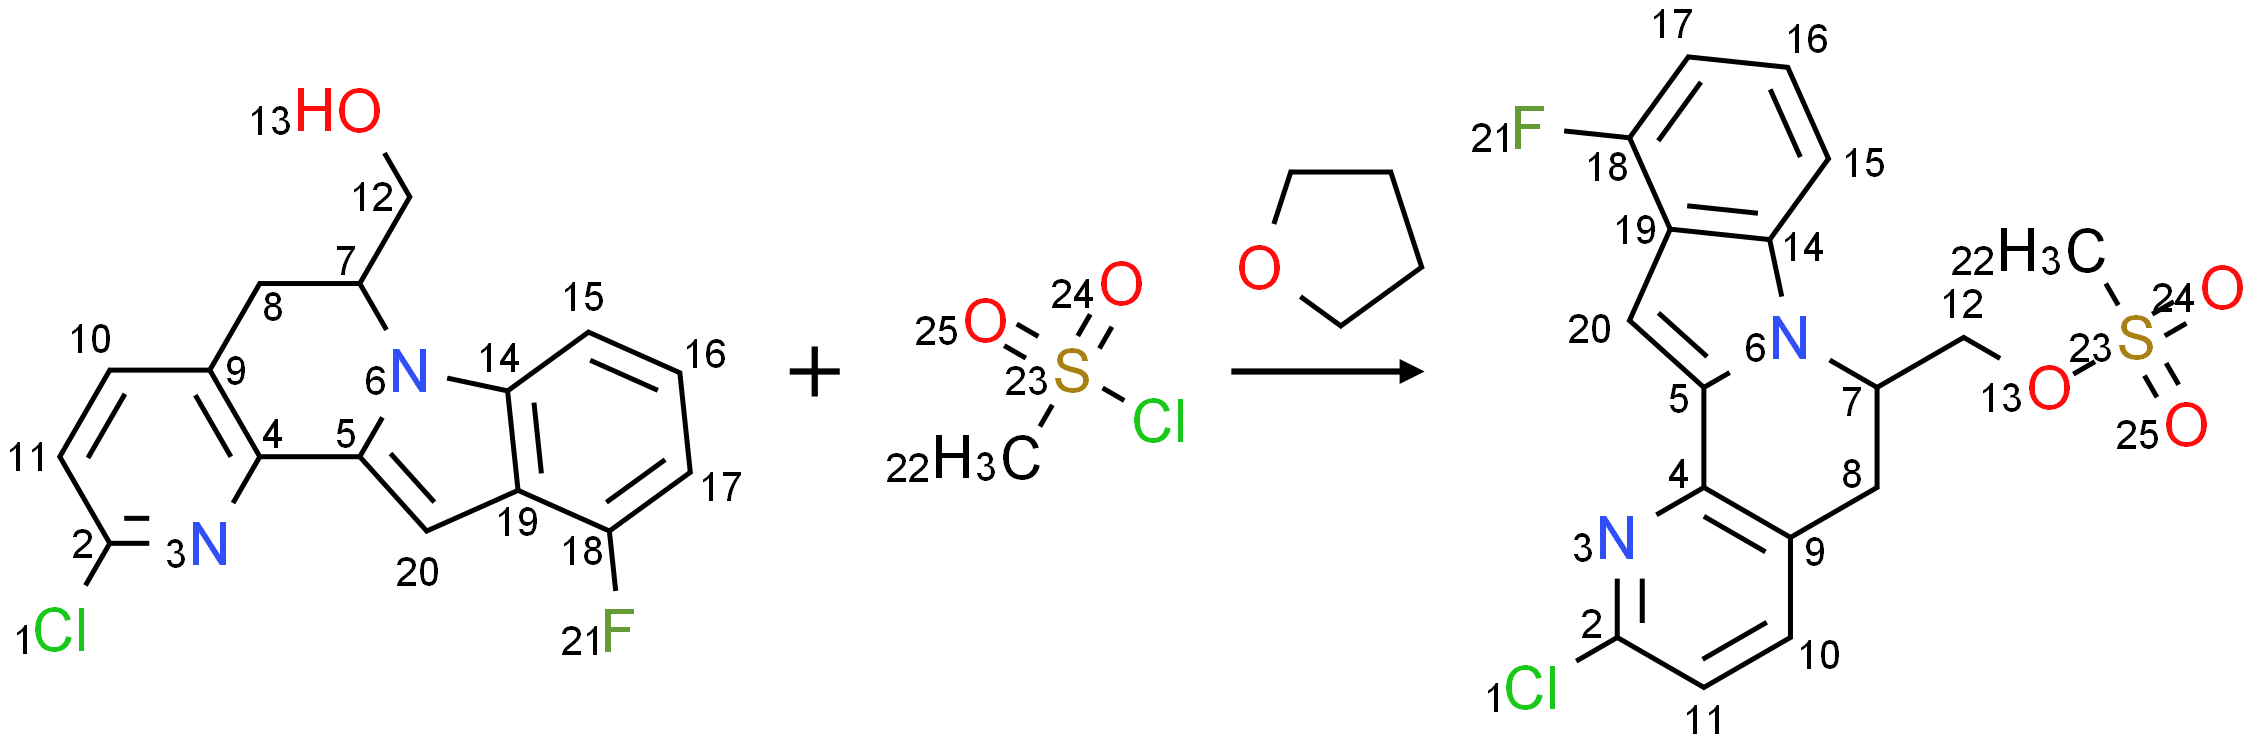

Patent:       US09243002B2
Reaction_id:  ord-b31d705b13074e8b9bb501ff49dbf8c6
A mixture of (2-chloro-11-fluoro-5,6-dihydroindolo[1,2-h][1,7]naphthyridin-6-yl)methanol (200 mg, 0.66 mmol) and TEA (200 mg, 1.98 mmol) in THF (8 mL) was stirred at 0° C. and MsCl (114 mg, 0.99 mmol) was added dropwise. The reaction was stirred at RT for 8 h. The reaction was washed with 1N HCl and extracted with DCM, dried with Na2SO4 and concentrated to give (2-chloro-11-fluoro-5,6-dihydroindolo[1,2-h][1,7]naphthyridin-6-yl)methyl methanesulfonate (200 mg, yield: 80%). 1H-NMR (CDCl3, 400 MHz) δ 7.54 (d, J=8.0 Hz, 1H), 7.41 (s, 1H), 7.11˜7.20 (m, 3H), 6.79˜6.83 (m, 1H), 5.03˜5.08 (m, 1H), 4.06˜4.21 (m, 2H), 3.46˜3.52 (m, 1H), 3.24˜3.28 (m, 1H), 2.69 (s, 3H). MS (M+H)+: 381/383.


In [148]:
draw_reaction(rxn.loc[idx], highlight_text='TEA')

### Conclusion
all non chemically-meaningful compounds, e.g. ```'solution', 'solid', 'resultant mixture', 'powder', 'crude material'```, with no smiles can be dropped. It is just parsing error. We keep 'ice water', 'ice', 'water' for the moment as it might indicate solvent or temperature.

In [80]:
empty_smi = df[df.smiles.isna()].name.value_counts()
empty_smi

solution                                                                                      37355
ice water                                                                                     29384
solid                                                                                         19056
ice                                                                                           18000
resultant mixture                                                                             10785
                                                                                              ...  
hdyrochloric acid                                                                                 1
C23H24BrClN4O3S                                                                                   1
1-(4-Bromo-benzyl)-4-4-(4-methoxy-benzensulfonyl)-piperidine-4-carboxylic acid ethyl ester        1
3,3'-Dimethyl-1,1'-peroxydicyclohexylamine                                                        1


In [580]:
q = 0.99
print(empty_smi[empty_smi > empty_smi.quantile(q)].sum() / empty_smi.sum())
token_list = empty_smi[empty_smi > empty_smi.quantile(q)]
token_list

0.6641872656191197


solution                                                               37355
ice water                                                              29384
solid                                                                  19056
ice                                                                    18000
resultant mixture                                                      10785
aqueous solution                                                       10393
TEA                                                                     8281
crude product                                                           7794
hexanes                                                                 7045
oil                                                                     6787
product                                                                 5591
resultant solution                                                      5091
hydrochloride salt                                                      3277

In [581]:
print(np.array2string(token_list.index.values, separator=',', max_line_width=10))

['solution',
 'ice water',
 'solid',
 'ice',
 'resultant mixture',
 'aqueous solution',
 'TEA',
 'crude product',
 'hexanes',
 'oil',
 'product',
 'resultant solution',
 'hydrochloride salt',
 'compound',
 'amine',
 'mixture',
 'acid chloride',
 'ester',
 'alcohol',
 'hexanes ethyl acetate',
 'powder',
 'polyphosphoric acid',
 'Grignard reagent',
 'EtOAc hexanes',
 'petroleum ether',
 'crude material',
 'amide',
 'foam',
 'methyl ester',
 'EtOAc-hexanes',
 'ethyl acetate hexanes',
 'aldehyde',
 '4A',
 'cuprous iodide',
 'stainless steel',
 'material',
 'crystals',
 'crude mixture',
 'liquid',
 'suspension',
 'catalyst',
 'three',
 'anhydride',
 'title compound',
 'resultant suspension',
 'SiO2',
 'Ice water',
 'ketone',
 'N,N-dimethylaminopyridine',
 '( a )',
 'dimethyl acetal',
 'cuprous chloride',
 '( 1 )',
 'steel',
 'residue',
 'xylenes',
 'acid',
 'desired product',
 '( 100 )',
 'diazonium salt',
 'white solid',
 'carboxylic acid',
 'ethyl ester',
 '3A',
 '( 2 )',
 'resin',
 'Tefl

In [394]:
drop_list = [
             # 'solution',
             'ice water',
             # 'solid',
             'ice',
             # 'resultant mixture',
             'aqueous solution',
             'TEA',
             # 'crude product',
             'hexanes',
             # 'oil',
             # 'product',
             # 'resultant solution',
             'hydrochloride salt',
             # 'compound',
             'amine',
             # 'mixture',
             'acid chloride',
             'ester',
             'alcohol',
             'hexanes ethyl acetate',
             # 'powder',
             'polyphosphoric acid',
             'Grignard reagent',
             'EtOAc hexanes',
             'petroleum ether',
             # 'crude material',
             'amide',
             # 'foam',
             'methyl ester',
             'EtOAc-hexanes',
             'ethyl acetate hexanes',
             'aldehyde',
             # '4A',
             'cuprous iodide',
             # 'stainless steel',
             # 'material',
             # 'crystals',
             # 'crude mixture',
             # 'liquid',
             # 'suspension',
             # 'catalyst',
             # 'three',
             'anhydride',
             # 'title compound',
             # 'resultant suspension',
             # 'SiO2',
             'Ice water',
             'ketone',
             'N,N-dimethylaminopyridine',
             # '( a )',
             'dimethyl acetal',
             'cuprous chloride',
             # '( 1 )',
             # 'steel',
             # 'residue',
             'xylenes',
             'acid',
             # 'desired product',
             # '( 100 )',
             'diazonium salt',
             # 'white solid',
             'carboxylic acid',
             'ethyl ester',
             # '3A',
             # '( 2 )',
             'resin',
             # 'Teflon',
             'base',
             # 'crude residue',
             'IMS',
             # 'II',
             # '10',
             # '( m )',
             # 'raw materials',
             'stannous chloride dihydrate',
             'imine',
             "N,N'-carbonyldiimidazole",
             # 'saturated aqueous solution',
             # '( 3 )',
             'Hexanes',
             'stannous chloride',
             # 'saturated solution',
             'solvent',
             # '( b )',
             # '( 5 )',
             'tetrakistriphenylphosphine palladium',
             'Mg',
             'CuBr',
             # '( s )',
             'NaIO4',
             # '3','1',
             # 'glass',
             # 'intermediate',
             'cuprous cyanide',
             'hydrate',
             '4-N,N-dimethylaminopyridine',
             'peroxide',
             # '( 4 )',
             'N,N′-carbonyldiimidazole',
             'NH4OAc',
             'ferric chloride',
             'Na',
             'ice H2O',
             'N-Aryl-benzenesulfonamides',
             'water ice',
             'hexanes EtOAc',
             # '( c )',
             'NaH2PO4',
             # 'reagent',
             # 'gum',
             # '2','20',
             # 'teflon',
             'nitrile',
             'alkyne',
             'reduced iron',
             'oxime',
             'monohydrate',
             # '( g )',
             # '( w )',
             'diol',
             # 'Intermediate 1',
             # 'starting material',
             'fumarate salt',
             # 'Heterocyclic',
             'EtOAc Hexanes',
             'stannic chloride',
             'nitro',
             'mercuric chloride',
             'esters',
             # '( I )',
             'KHCO3',
             'LiOH monohydrate',
             'polystyrene',
             # 'yellow solid',
             # '( A )',
             # 'solids',
             'amides',
             # '15',
             # '( 6 )',
             'Na2S2O5',
             'mercuric acetate',
             # 'final mixture',
             'Ice',
             'amino acid',
             # '( d )',
             'FeCl3',
             'ice-salt',
             'tetrakis(triphenyl-phosphine)palladium',
             'cuprous bromide',
             # '50',
             # 'paraffin',
             'epoxide',
             'diamine',
             'triethylamine-2HF',
             '1,1-carbonyldiimidazole',
             # '( 8 )',
             'ethanolic solution',
             'mercuric oxide',
             # 'III',
             # 'raw material',
             # '( 9 )',
             # '12',
             # 'desired material',
             'methanolic solution',
             'PdCl2dppf',
             'peptide',
             # 'title compounds',
             # 'salt',
             'palladium tetrakistriphenylphosphine',
             # '1-L',
             # 'free base',
             # '( 7 )',
             # '30',
             'diazonium',
             'acetate salt',
             'diethyl ester',
             # '10/1',
             'potassium tert.-butylate',
             'olefin',
             # 'Intermediate 2',
             'CsCO3',
             # 'crystal',
             # 'one',
             'cuprous oxide',
             'sulfonamide',
             # '( 10 )',
             'secondary amine',
             # 'Example 1',
             # 'two',
             # '4',
             # 'eluent',
             'N,N-dicyclohexylcarbodiimide',
             'ethyl acetate petroleum ether',
             'ceric ammonium nitrate',
             # '40',
             'Amine',
             # 'Compound II',
             # '( B )',
             'CrO3',
             # '100',
             'thiol',
             'cupric acetate',
             # 'complex',
             'petroleum ether ethyl acetate',
             # 'IV',
             # 'atmosphere',
             # '2-L',
             'amines',
             'oxide',
             # 'step-ii',
             # 'four',
             # 'E1',
             # 'desired compound',
             'acyl chloride',
             # '( II )',
             # 'crude compound',
             'triethyl phosphonoacetate',
             # 'resultant product',
             # 'Heterocycles',
             'CuSO4.5H2O',
             'ethylene ketal',
             # 'Intermediate 6',
             # 'crude intermediate',
             'ethyl acetate-hexanes',
             'acetal',
             # 'solution A',
             'ammonium salt',
             'aq. solution',
             'oxalate salt',
             '2B',
            '5,6-dihydrospiro[benzo[1,2-b:5,4-b′]difuran-3,3′-indol]-2″(1′H)-one',
            'Cu',
            'alcohols',
            # '1h',
            'ice hydrochloric acid',
            'tertiary amine',
            # 'desired intermediate',
            # '1a',
            'heptanes',
            'ferrous sulfate',
            'Hexanes EtOAc',
            # '( 15 )',
            # '9',
            'cupric chloride',
            # 'ArH',
            # '11',
            'pinacol ester',
            # '21',
            # 'title material',
            'Pd(Ph3)4',
            # 'D4',
            # 'Intermediate 4',
            # 'amino',
            'tetrakistriphenylphosphine palladium(0)',
            # 'DNA',
            # '60',
            'diethyl acetal',
            # 'compound 1',
            'SeO2',
            'Cu2O',
            'industrial methylated spirit',
            # 'mixed solvent',
            # 'dihydrobromide',
            'tetrakistriphenylphosphine palladium (0)',
            # 'crude solution',
            'amino acids',
            'TiCl3',
            # 'pure product',
            # 'Intermediate 14',
            # 'PTFE',
            # '2h',
            'HClO4',
            # 'A1',
            # '( 12 )',
            'Na2HPO4',
            'dioxanes',
            'sulfonic acid',
            'di-TFA',
            # 'white crystals',
            # 'E2',
            # 'trihydrochloride',
            'CuCl2',
            # 'polymer',
            # 'formula II',
            # '1L',
            'Boc',
            # '13',
            # 'stock solution',
            'CeCl3',
            'carboxylic acids',
            'H+',
            'TBF',
            'Ag2O',
            'CO3',
            # 'R3—(CH2)m—NH2',
            # '( 11 )',
            'Petroleum ether',
            # 'intermediate 27',
            'SO2Cl2',
            # '1E',
            # '( i )',
            # '( C )',
            # '25',
            # 'Solution A',
            # 'mixed solution',
            # 'hydrobromide salt',
            # '14',
            # 'resultant residue',
            # 'Amine-1',
            # 'Intermediate 12',
            # 'bromo',
            'potassium t-butylate',
            # 'needles',
            # 'Intermediate 5',
            'enolate',
            'carbonyl',
            'Pt',
            'SnCl2 dihydrate',
            # 'quartz',
            'tetrakis-(triphenylphosphine)palladium',
            # 'Intermediate 3',
            # '5-L',
            # 'example 1 ( b )',
            # '( E )-',
            'hydrocarbon',
            'ice methanol',
            'ferric chloride hexahydrate',
            'diacid',
            'halogen',
            'crude acid',
            # '18',
            # 'same solvent',
            # 'C2',
            # 'molar solution',
            # 'starch',
            # '( 20 )',
            # '17',
            'hydrazone',
            'Ti(OEt)4',
            # '( ii )',
            'K3PO4.3H2O',
            # '( 1H )',
            # '0C',
            'Pd[PPh3]4',
            'ferrous chloride tetrahydrate',
            # 'chloro',
            'tetrakis (triphenylphosphine)palladium(0)',
            # '( M )',
            'alkoxide',
            # '1-a',
            'pyridinium bromide perbromide',
            # '( 14 )',
            'magnesium salt',
            # '2L',
            # 'target compound',
            # 'orange oil',
            # 'final product',
            # 'intermediate 1',
            # '2A',
            # '( III )',
            'Cu(I)I',
            'FeSO4.7H2O',
            # '2C',
            'tetrakis triphenylphosphine palladium',
            # 'Formula III',
            # '1/1',
            # '200',
            # 'D1',
            # 'colorless oil',
            # 'diazo',
            # 'formula III',
            'PdC',
            'Pd--C',
            'polyester',
            'lactone',
            # 'VI','5',
            'hydrazide',
            'Na2SO4.10H2O',
            'glycol',
            # 'Solvent B',
            'primary amine',
            'NaHB(OAc)3',
            # '6',
            # '( 13 )',
            # 'Intermediate 7',
            # 'buffer solution',
            'N-oxide',
            # '1A',
            'potassium osmate dihydrate',
            # '( 18 )',
            # '( 16 )',
            'halide',
            'diester',
            'zeolite',
            'ice acetone',
            # 'Intermediate 100',
            'hexanes ether',
            'carbamates',
            'ether-hexane',
            'petroleum ether EtOAc',
            # 'beige solid',
            'PdCl2(dppf)-CH2Cl2Adduct',
            'Amide',
            'sulfuric acid ester',
            'PdCl2(dppf)CH2Cl2',
            'Hastelloy',
            # '( 19 )',
            # 'yellow oil',
            'ammonium sulfide',
            'azoisobutyronitrile',
            # 'Example 1 ( i )',
            'butyl ester',
            # 'final solution',
            # '3h',
            # 'Intermediate 9',
            # 'syrup',
            # '16',
            # 'compound 5',
            # '3R',
            # 'crude oil',
            # '2-N',
            # 'ion',
            'dihydrate',
            # 'Example 1 ( a )',
            # '( E )',
            'polyethylene glycol',
            'RuCl3',
            'dimethyl ester',
            '2-Me THF',
            # 'reaction mixture',
            'tetrakis(triphenyl-phosphine)palladium(0)',
            'Aqueous solution',
            'ferrous sulfate heptahydrate',
            # 'tricyclic bromide',
            '4-nitrophenylchloroformate',
            # '70',
            # '5a',
            'acyloxyalkyl carbamates',
            # 'polyol',
            'hemihydrate',
            'aqueous saturated solution',
            'ether hexanes',
            'Ba(OH)2',
            'dichlorobis(triphenylphosphine) palladium (II)',
            'sulfone',
            # '( D )',
            "N,N'-Carbonyldiimidazole",
            'ion-exchanged',
            # 'alkyl',
            # '1c',
            'ice NaCl',
            'enamine',
            'dimaleate',
            # 'off-white solid',
            # '3-L',
            'EtOAc petroleum ether'
]

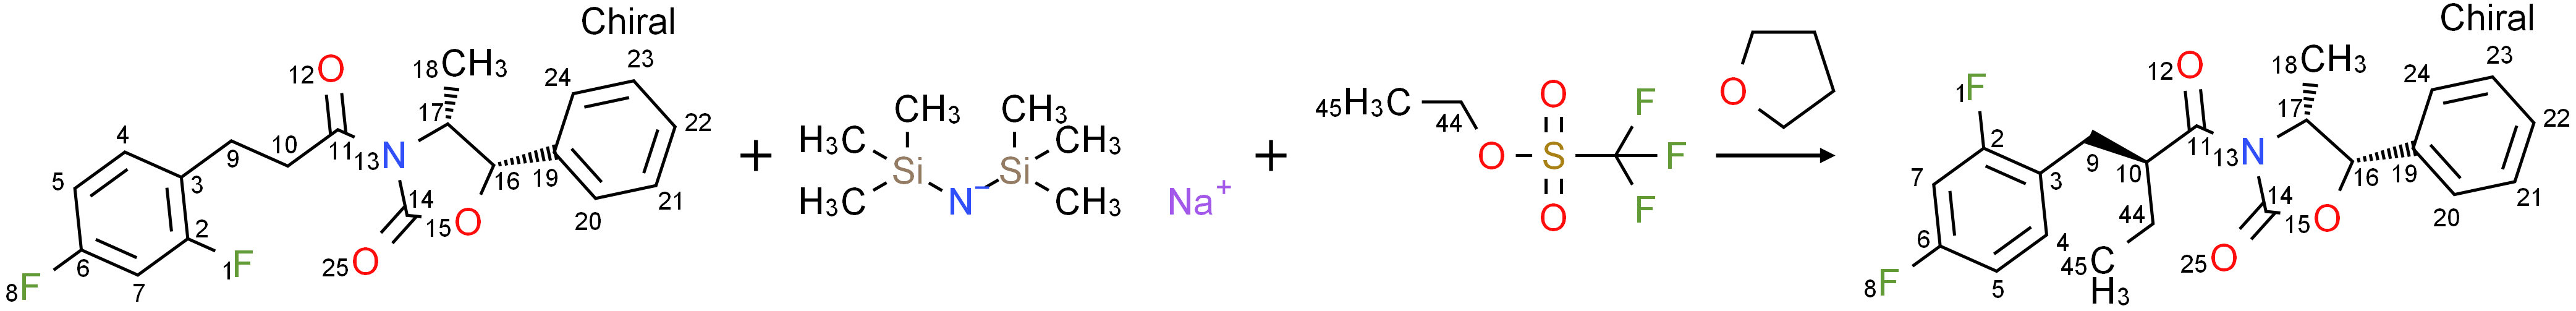

Patent:       US07388023B2
Reaction_id:  ord-1283cdf6e9494f07a7fa75b0cc0ec495
A flask was charged with 54 g (156 mmol) of (4R,5S)-3-[3-(2,4-difluoro-phenyl)-propionyl]-4-methyl-5-phenyl-oxazolidin-2-one and 300 mL of dry THF, and the solution was cooled to −78° C. To this solution was added 172 mL (172 mmol) of 1 M NaHMDS in THF, and the mixture was stirred cold for 1 hour. Then 30.6 g (172 mmol) of ethyl triflate was added dropwise to the enolate solution, and the reaction mixture was warmed to −40° C. to −30° C. and stirred for 1.5 hours. The reaction mixture was quenched by the addition of aqueous brine. The THF was removed under reduced pressure and the residue was partitioned between EtOAc and water. The organics were collected, and EtOAc was removed under reduced pressure. The resulting crude oil was purified by column chromatography (3:1 hexanes/EtOAc eluent) to get 29.5 g of an impure oil that was used without further purification.


In [577]:
token = 'enolate'
# idx = df[df.smiles.isna() & (df.name == token)].index
draw_reaction(rxn.loc[idx], highlight_text=token)

Total occurencies: 6


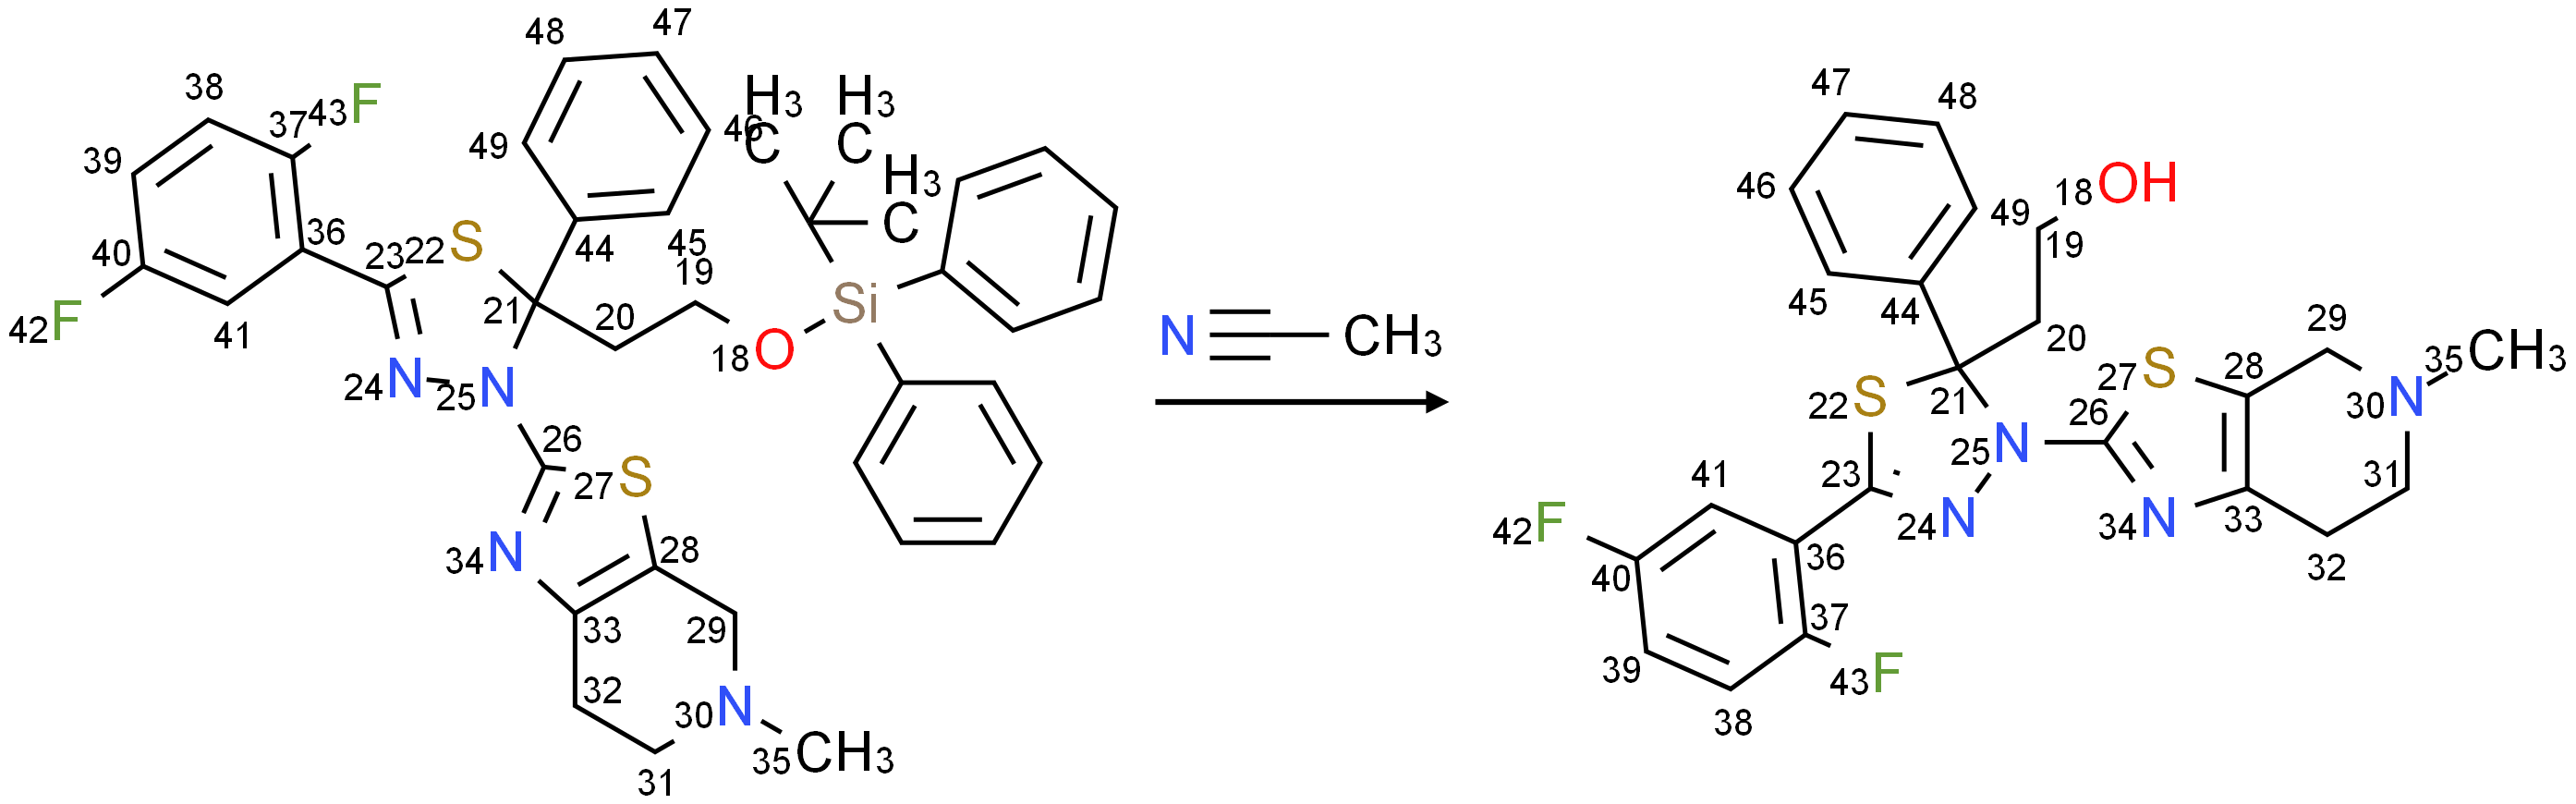

Patent:       US09221841B2
Reaction_id:  ord-633baba5b94a4c129fd239fdd11bc962
To a solution of 2-(2-(2-(tert-butyldiphenylsilyloxy)ethyl)-5-(2,5-difluorophenyl)-2-phenyl-1,3,4-thiadiazol-3(2H)-yl)-5-methyl-4,5,6,7-tetrahydrothiazolo[5,4-c]pyridine (0.070 g, 0.098 mmol) in 2 mL of anhydrous acetonitrile was added HF-TEA (0.160 mL, 0.99 mmol). The solution was stirred at room temperature for 16 hours then slowly quenched with saturated NaHCO3 (20 mL). The mixture was extracted with EtOAc (3×10 mL) and the combined organic phases were washed with brine (10 mL), dried over Na2SO4 and concentrated in vacuo. The residue was purified by flash column chromatography (0-1% MeOH/DCM) and the residue was dissolved in 2 mL of methanol and treated with 1N HCl/MeOH (2 mL). After stirring for 10 minutes, the solution was concentrated in vacuo. The residue was triturated with diethyl ether, filtered, washed with ether and dried in vacuo to afford the desired product as a yellow powder, 0.023 g, 42%. MS

In [201]:
#TODO fix 'HF-TEA' token interpreted as 'TEA' only
idx = rxn.notes.str.contains(' HF-TEA')
print("Total occurencies:", idx.sum())
draw_reaction(rxn.loc[idx], highlight_text='HF-TEA')